In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense, LeakyReLU

In [12]:
# Load MNIST dataset
(x_train, y_train), (_, _) = mnist.load_data()

In [11]:
x_train = x_train.astype('float32') / 255.0
x_train = x_train.reshape((x_train.shape[0], -1))  # Flatten the images

In [3]:
# Define the encoder model
input_dim  = 784
latent_dim = 2

In [4]:
encoder_input = Input(shape=(input_dim,), name='encoder_input')
x = Dense(300)(encoder_input)
x = LeakyReLU()(x)
encoder_output = Dense(latent_dim)(x)
encoder_output = LeakyReLU()(encoder_output)

encoder = Model(encoder_input, encoder_output, name='encoder_model')

In [5]:
# Define the decoder model
decoder_input = Input(shape=(latent_dim,), name='decoder_input')
x = Dense(300)(decoder_input)
x = LeakyReLU()(x)
decoder_output = Dense(input_dim)(x)
decoder_output = LeakyReLU()(decoder_output)

decoder = Model(decoder_input, decoder_output, name='decoder_model')

In [6]:
# Compile and train the autoencoder (combine encoder and decoder)
autoencoder_input = encoder_input
autoencoder_output = decoder(encoder_output)
autoencoder = Model(autoencoder_input, autoencoder_output)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True)

Epoch 1/50
235/235 [==============================] - 8s 24ms/step - loss: 0.0575
Epoch 2/50
235/235 [==============================] - 6s 24ms/step - loss: 0.0534
Epoch 3/50
235/235 [==============================] - 6s 24ms/step - loss: 0.0512
Epoch 4/50
235/235 [==============================] - 6s 25ms/step - loss: 0.0487
Epoch 5/50
235/235 [==============================] - 6s 24ms/step - loss: 0.0474
Epoch 6/50
235/235 [==============================] - 6s 24ms/step - loss: 0.0467
Epoch 7/50
235/235 [==============================] - 6s 24ms/step - loss: 0.0463
Epoch 8/50
235/235 [==============================] - 6s 23ms/step - loss: 0.0458
Epoch 9/50
235/235 [==============================] - 6s 25ms/step - loss: 0.0455
Epoch 10/50
235/235 [==============================] - 6s 24ms/step - loss: 0.0452
Epoch 11/50
235/235 [==============================] - 6s 25ms/step - loss: 0.0449
Epoch 12/50
235/235 [==============================] - 6s 24ms/step - loss: 0.0447
Epoch 13/50
2

In [7]:
# Encode the MNIST dataset to the latent space
encoded_imgs = encoder.predict(x_train)

1875/1875 [==============================] - 7s 4ms/step


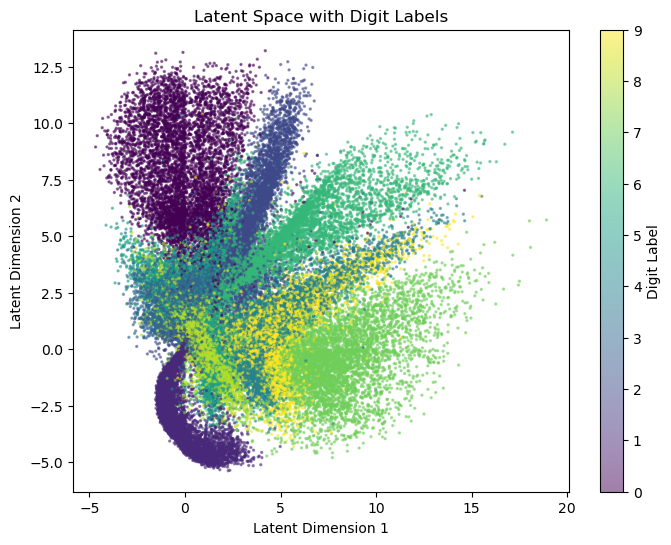

In [13]:
# Plot the latent space with color hue based on labels
plt.figure(figsize=(8, 6))
scatter = plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_train, cmap='viridis', alpha=0.5, s=2)
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.title('Latent Space with Digit Labels')

# Add a colorbar
cbar = plt.colorbar(scatter, ticks=range(10))
cbar.set_label('Digit Label')
plt.show()

#### Select 5 random points from the latent space and reconstruct

1/1 [==============================] - 0s 51ms/step


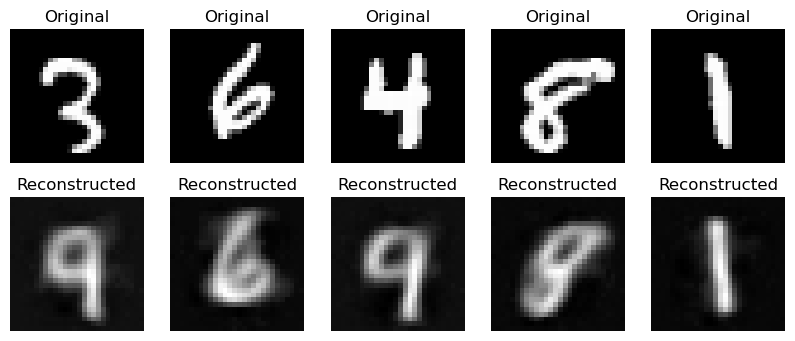

In [25]:
num_samples = 5
random_indices = np.random.choice(len(encoded_imgs), num_samples, replace=False)
random_latent_points = encoded_imgs[random_indices]

# Decode the selected points
decoded_imgs = decoder.predict(random_latent_points)

# Plot original and reconstructed images
plt.figure(figsize=(10, 4))
for i, index in enumerate(random_indices):
    # Original image
    ax = plt.subplot(2, num_samples, i + 1)
    plt.imshow(x_train[index].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed image
    ax = plt.subplot(2, num_samples, i + 1 + num_samples)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()

#### Sample 5 random points in the latent space within the boundary of latent dimensions

1/1 [==============================] - 0s 59ms/step


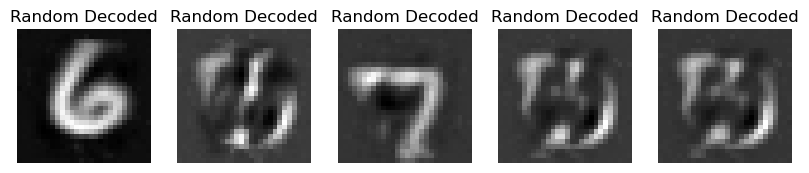

In [27]:
latent_space_bound = np.max(np.abs(encoded_imgs), axis=0)
random_points = np.random.uniform(-latent_space_bound, latent_space_bound, size=(num_samples, latent_dim))

# Decode the random points
random_decoded_imgs = decoder.predict(random_points)

# Plot the decoded random points
plt.figure(figsize=(10, 2))
for i in range(num_samples):
    ax = plt.subplot(1, num_samples, i + 1)
    plt.imshow(random_decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Random Decoded")
    plt.axis('off')
plt.show()